# ADVERTISING SALES CHANNEL PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the Data

In [2]:
df = pd.read_csv('Advertising sales channel prediction.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Here the all null values are zero

In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
df.shape

(200, 5)

Dataset contains 200 rows and 5 columns

In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Dataset contains 5 columns

# Summary Statistics

In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


1 The mean is more than median 50% percentile in all columns.

2 There is a large difference in 75% percentile and max in Unnamed:0 and TV.

3 The 1 and 2 observation suggest that there are extreme outliers present in these three columns.

In [9]:
df.sales.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

Target/dependent variables is discrete and categorial in nature


In [10]:
df.sales.value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

Here the all sales values are higly concentrated

In [11]:
df.TV.unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

Target/dependent variables is discrete and categorial in nature


In [12]:
df.TV.value_counts()

197.6    2
237.4    2
177.0    2
76.4     2
222.4    2
        ..
18.8     1
19.4     1
26.8     1
139.2    1
44.5     1
Name: TV, Length: 190, dtype: int64

Here the all TV values are higly concentrated

# Data Visualizations

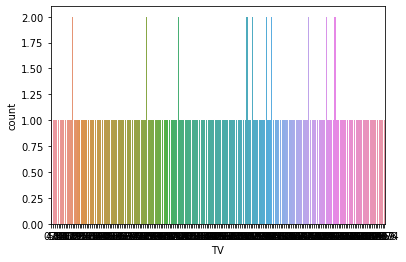

In [13]:
sns.countplot(df["TV"]);

Data contains all columns distribution will be same.

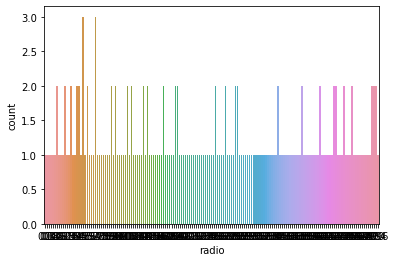

In [14]:
sns.countplot(df['radio']);

Data contains all columns distribution normally

<AxesSubplot:xlabel='newspaper', ylabel='count'>

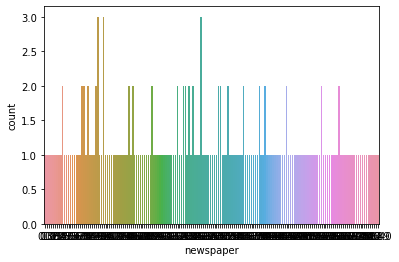

In [15]:
sns.countplot(df['newspaper'])

Data contains all columns distribution normally

<AxesSubplot:xlabel='sales', ylabel='count'>

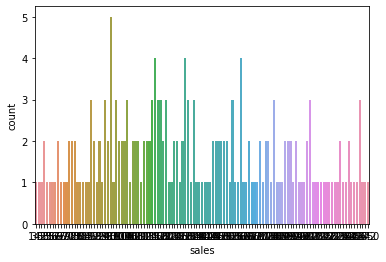

In [16]:
sns.countplot(df['sales'])

Here all columns will be not  distributed normally

<AxesSubplot:>

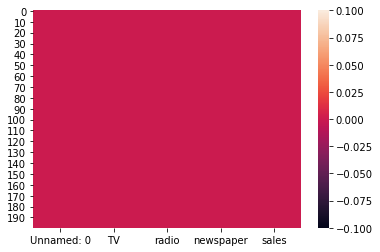

In [17]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [18]:
dfcor=df.corr()
dfcor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

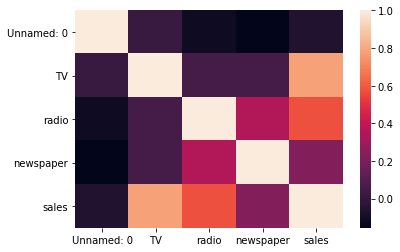

In [19]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

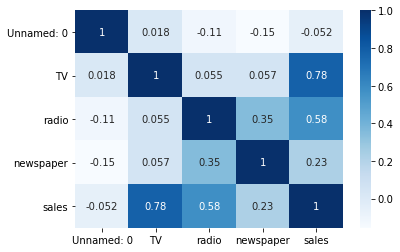

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark shades are higly correlated

<AxesSubplot:>

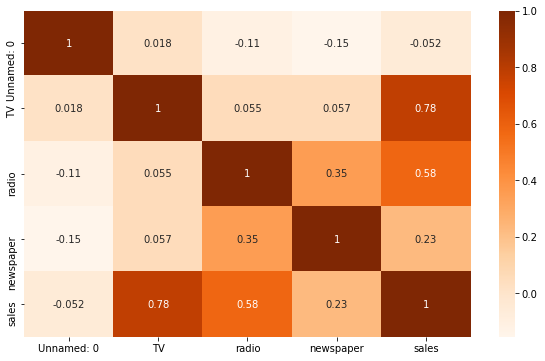

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

sales is higly correlated with newspaper

newspaper is highly negatively correlated with TV

TV is higly positively correlated with Unnamed:0

TV is negatively correlated with Sales

radio is highly correlated with mewspaper


# Plotting Outliers

In [22]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:>

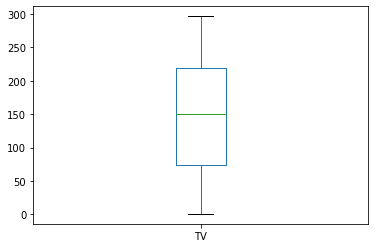

In [23]:
df['TV'].plot.box()

<AxesSubplot:>

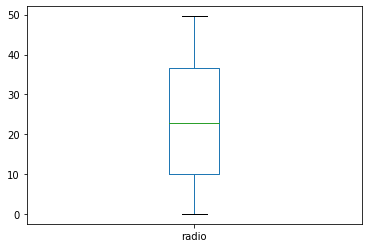

In [24]:
df['radio'].plot.box()

Here tv and radio have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

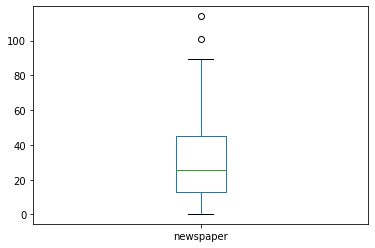

In [25]:
df['newspaper'].plot.box()

Here newspaper have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

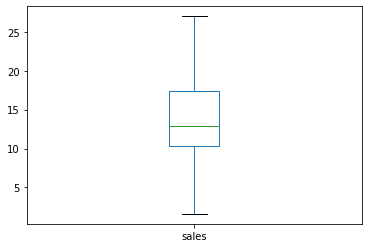

In [26]:
df['sales'].plot.box()

In [27]:
df.shape

(200, 5)

Dataset contains 200 rows and 5 columns

In [28]:
collist=df.columns.values
ncol=5
nrows=10

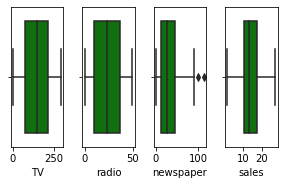

In [29]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Here we can find the collist of the all outliers.

# To Check distribution skewness

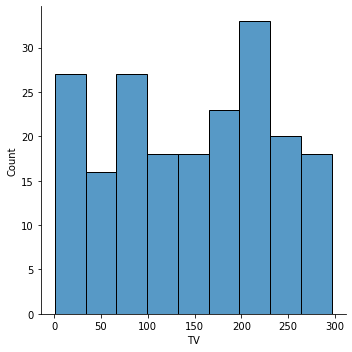

In [30]:
sns.displot(df['TV'])

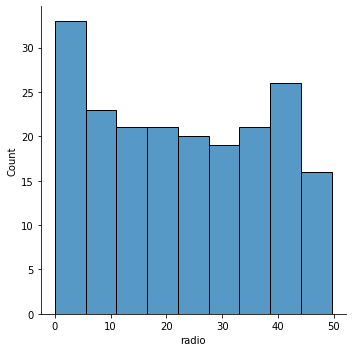

In [31]:
sns.displot(df['radio'])

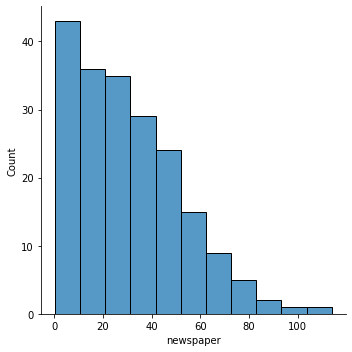

In [32]:
sns.displot(df['newspaper'])

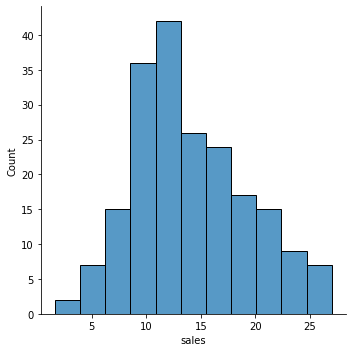

In [33]:
sns.displot(df['sales'])

Data is not normally distributed in the TV,Radio,newspaper and sales columns.

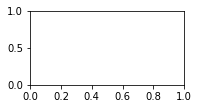

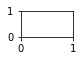

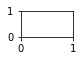

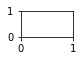

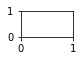

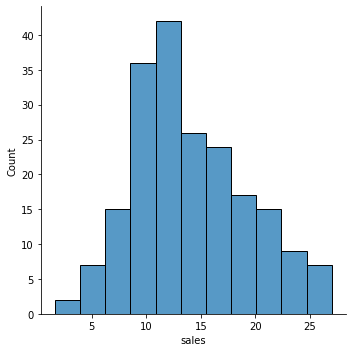

In [34]:
#plt.figure(figsize=(5*totalcol.5*totalcol))
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.displot(df[collist[i]])
    plt.tight_layout()

other independent variables are right skewed/positively skewed

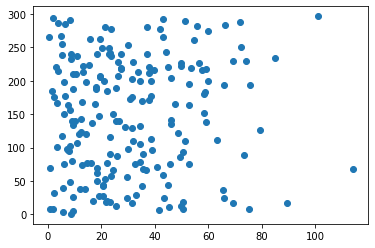

In [35]:
plt.scatter(df['newspaper'],df['TV'])

Here scattiring plot values of newspaper and TV 

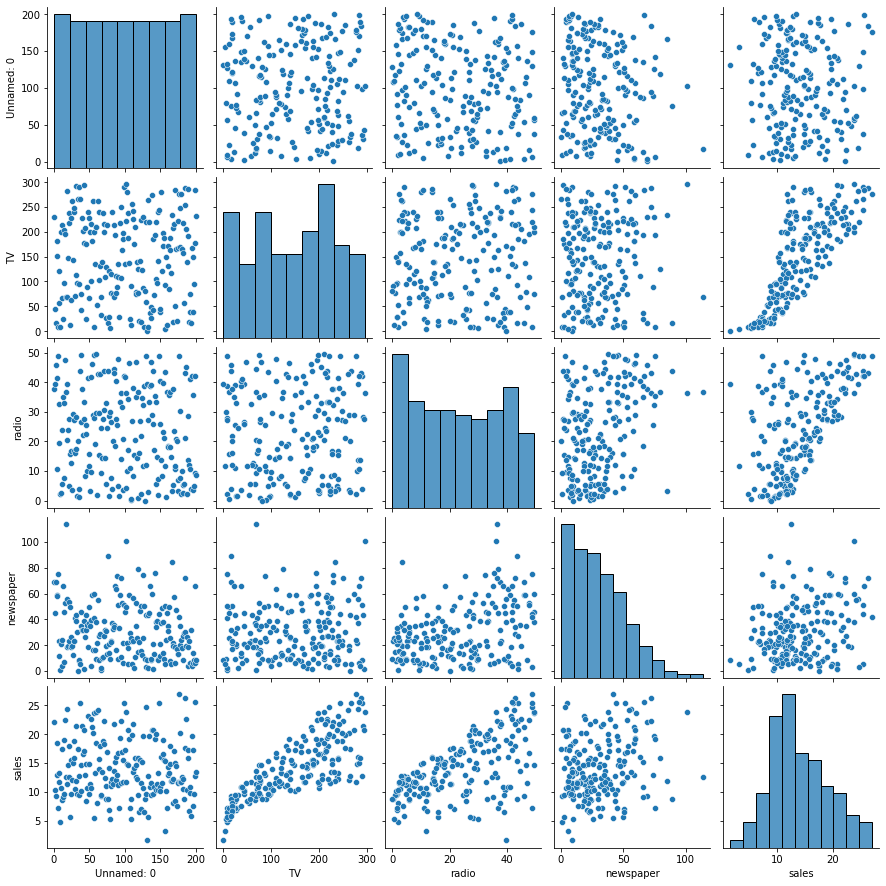

In [36]:
sns.pairplot(df)

Remove the missing values.

drop  the nahativitycorrelated columns.

remove the outliers.

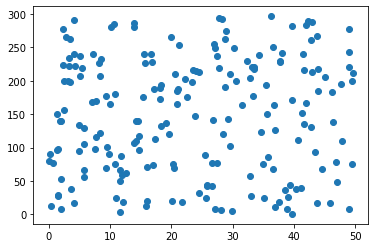

In [37]:
plt.scatter(df['radio'],df['TV'])
plt.show()

Here scatter plots of radio and TV

In [38]:
df.drop('radio',axis=1,inplace=True)

In [39]:
df.head()

,Unnamed: 0,TV,newspaper,sales
0,1,230.1,69.2,22.1
1,2,44.5,45.1,10.4
2,3,17.2,69.3,9.3
3,4,151.5,58.5,18.5
4,5,180.8,58.4,12.9


In [40]:
df.shape

(200, 4)

Dtaset contains 200 rows and 4 columns

In [41]:
df.head()

,Unnamed: 0,TV,newspaper,sales
0,1,230.1,69.2,22.1
1,2,44.5,45.1,10.4
2,3,17.2,69.3,9.3
3,4,151.5,58.5,18.5
4,5,180.8,58.4,12.9


In [42]:
df.columns

Index(['Unnamed: 0', 'TV', 'newspaper', 'sales'], dtype='object')

# Removing Outliers

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 1.77894547e+00, 1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 6.69578760e-01, 6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.78354865e+00, 9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.28640506e+00, 8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 1.28180188e+00, 2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 2.04592999e+00, 1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 3.24708413e-01, 4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 8.72486994e-01, 1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.36042422e+00, 1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 4.30581584e-01, 6.57617064e-01],
       [1.55020485e+00, 9.45155670e-01, 2.92486143e-01, 1.04190753e+00],
       [1.53288413e+00, 7.90028350e-01, 1.22232878e+00, 6.48970529e-01],
       [1.51556340e+00, 1.43908760e+00, 1.62704048e+00, 9.26620392e-01],
       [1.49824268e+00, 5.78501712e-01, 1.07502697e

Here removing outliers of df

In [44]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


thershold is 3 and print np where z>3

In [45]:
df_new=df[(z<3).all(axis=1)]

In [46]:
df_new

,Unnamed: 0,TV,newspaper,sales
0,1,230.1,69.2,22.1
1,2,44.5,45.1,10.4
2,3,17.2,69.3,9.3
3,4,151.5,58.5,18.5
4,5,180.8,58.4,12.9
...,...,...,...,...
195,196,38.2,13.8,7.6
196,197,94.2,8.1,9.7
197,198,177.0,6.4,12.8
198,199,283.6,66.2,25.5


In [47]:
df.shape

(200, 4)

Dataset contains 200 rows and 4 columns

In [48]:
df_new.shape

(198, 4)

Dataset contains 198 rows and 4 columns

# Feature Engineering

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [50]:
scaledX

array([[-1.72341210e+00,  9.69852266e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.70609137e+00, -1.19737623e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.68877065e+00, -1.51615499e+00,  1.78354865e+00,
        -9.07405869e-01],
       [-1.67144992e+00,  5.20496822e-02,  1.28640506e+00,
         8.60330287e-01],
       [-1.65412920e+00,  3.94182198e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.63680847e+00, -1.61540845e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.61948775e+00, -1.04557682e+00, -3.24708413e-01,
        -4.27042783e-01],
       [-1.60216702e+00, -3.13436589e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.58484630e+00, -1.61657614e+00, -1.36042422e+00,
        -1.77205942e+00],
       [-1.56752558e+00,  6.16042873e-01, -4.30581584e-01,
        -6.57617064e-01],
       [-1.55020485e+00, -9.45155670e-01, -2.92486143e-01,
        -1.04190753e+00],
       [-1.53288413e+00,  7.90028350e-01, -1.22232878e+00,
      

the standard scaler values of the following

In [51]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [52]:
Y.explained_variance_ratio_

array([0.45904603, 0.2833742 , 0.20808651, 0.04949325])

the varience ratio of the PCA

In [53]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 45.90460298,  74.24202341,  95.0506749 , 100.        ])

the  varience accracy ratio of PCA

In [54]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 3


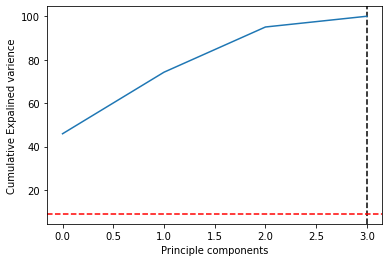

In [55]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here the y label define the cumulative explained varience and x label defined the principal components

# Checking Skewness 

In [56]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
newspaper     0.894720
sales         0.407571
dtype: float64

# Regerssion Methods

In [57]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [58]:
x = df.drop(['TV'],axis=1)
y = df["sales"]


In [59]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

0.28762349126466136
0.26742316936860855
0.34837284102472216
0.5338539126015655
0.30969192903446935
0.17964611677608605
0.21355575526325807
0.3455342810690995
0.2920668250641115
0.20961725582450025
0.37879393934545524
0.3761849963982503
0.2329000305762629
0.3242707435947856
0.4900525636618128
0.2730301348669309
0.3020134454161291
0.3037642626655203
0.5563680926737752
0.47561762079649783
0.5993683543885382
0.6150880695748644
0.26342729432224615
0.45924839782963955
0.31790030836821476
0.26140645235596865
0.32636659068469537
0.2969542358374738
0.27797972457128467
0.3212192680737228
0.5187397315522582
0.5022675853295009
0.27219645311963386
0.2402650052073184
1.17279774277347
0.33005968239000943
1.1051532185012338
0.6326950531678197
0.200756146364265
0.2941345806177022
0.3233348953414315
0.31766191290283907
0.23772915579531156
0.32074723362608737
0.21846572437632553
0.24802248187442918
0.1403458930534475
0.5155168045346104
0.7513623989430496
0.6016391750623432
0.2003784298558982
0.7432524755

In [60]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred_regressor = regressor.predict(x_test)

In [61]:
y_pred = regressor.predict(x_test)

In [62]:
y_pred

array([17.3, 14.8, 13.2, 10.1, 12.9, 22.4, 18. ,  9.5, 10.1, 16.6, 11.4,
        9.4, 19.6, 11.5, 12.3, 12.5, 15.2, 19.2,  9.7, 14.1, 12.6,  3.2,
       21.7, 11.8, 11.9, 25.5,  9.7, 11.7, 10.5, 13.6, 20.8,  7.6, 14.7,
       17.4,  5.3,  9.7,  9.7, 16.6,  5.6, 10.8, 20.2, 10.4, 14.8, 10.9,
       14.1,  9.2, 11.7,  6.6,  6.9, 17.4, 12.6, 14.9, 24.4, 20.2, 10.5,
       10.5,  8. , 15.5, 14.8, 21.7, 23.7, 21.7, 18. ,  7.2, 12.9, 15.2])

In [63]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The test accuracy of decisiontreeregressor is 100

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred = regressor.predict(x_test)
y_pred

array([17.3, 14.9, 13.2, 10.1, 12.9, 22.6, 18.3,  9.5, 10.1, 16.7, 11.4,
        9.3, 19.6, 11.5, 12.2, 12.5, 15.2, 19. ,  9.7, 14. , 12.7,  1.6,
       21.4, 11.8, 11.9, 27. ,  9.7, 11.7, 10.4, 13.4, 21.2,  7.6, 14.6,
       17.2,  5.3,  9.7,  9.9, 16.6,  5.9, 10.7, 20.1, 10.6, 14.8, 10.9,
       14.2,  9.3, 11.7,  6.7,  7. , 17.4, 12.6, 15. , 24.7, 20.2, 10.6,
       10.6,  8.1, 15.5, 15. , 21.5, 23.8, 21.8, 18.4,  7.3, 12.9, 15.3])

In [66]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

100.0

The test accuracy of logisticregressor is 100

In [67]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)



In [68]:
y_pred = regressor.predict(x_test)
y_pred

array([17.323, 14.82 , 13.275, 10.198, 12.845, 22.324, 18.266,  9.506,
       10.204, 16.775, 11.384,  9.41 , 19.595, 11.478, 12.211, 12.443,
       15.129, 19.064,  9.615, 13.973, 12.687,  4.286, 21.539, 11.807,
       11.909, 25.71 ,  9.638, 11.673, 10.36 , 13.343, 20.899,  7.444,
       14.65 , 17.21 ,  5.569,  9.648,  9.736, 16.782,  5.296, 10.798,
       20.062, 10.497, 14.792, 10.853, 14.266,  9.339, 11.666,  6.542,
        6.94 , 17.39 , 12.564, 14.777, 24.561, 20.095, 10.507, 10.502,
        8.133, 15.553, 14.839, 21.838, 23.833, 21.936, 18.294,  7.223,
       12.87 , 15.316])

In [69]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

99.97

The test accuracy of randomforestregressor is 99.97

# Cross Validiation method

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
print(cross_val_score(regressor,x,y,cv=5).mean())

0.995747798289678


# Hyperparameter Tunning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [74]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [76]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 11}

# Evaluate the model

In [77]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

99.40960227146407


# Saving the Model

In [78]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# prediction Method

In [79]:
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[17.323 14.82  13.275 10.198 12.845 22.324 18.266  9.506 10.204 16.775
 11.384  9.41  19.595 11.478 12.211 12.443 15.129 19.064  9.615 13.973
 12.687  4.286 21.539 11.807 11.909 25.71   9.638 11.673 10.36  13.343
 20.899  7.444 14.65  17.21   5.569  9.648]
[17.3 14.9 13.2 10.1 12.9 22.6 18.3  9.5 10.1 16.7 11.4  9.3 19.6 11.5
 12.2 12.5 15.2 19.   9.7 14.  12.7  1.6 21.4 11.8 11.9 27.   9.7 11.7
 10.4 13.4 21.2  7.6 14.6 17.2  5.3  9.7]


The train and test data is balanced most regressor methods hit the 99% accuracy with the datset.